In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('./shopping_behavior_updated.csv')
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [3]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


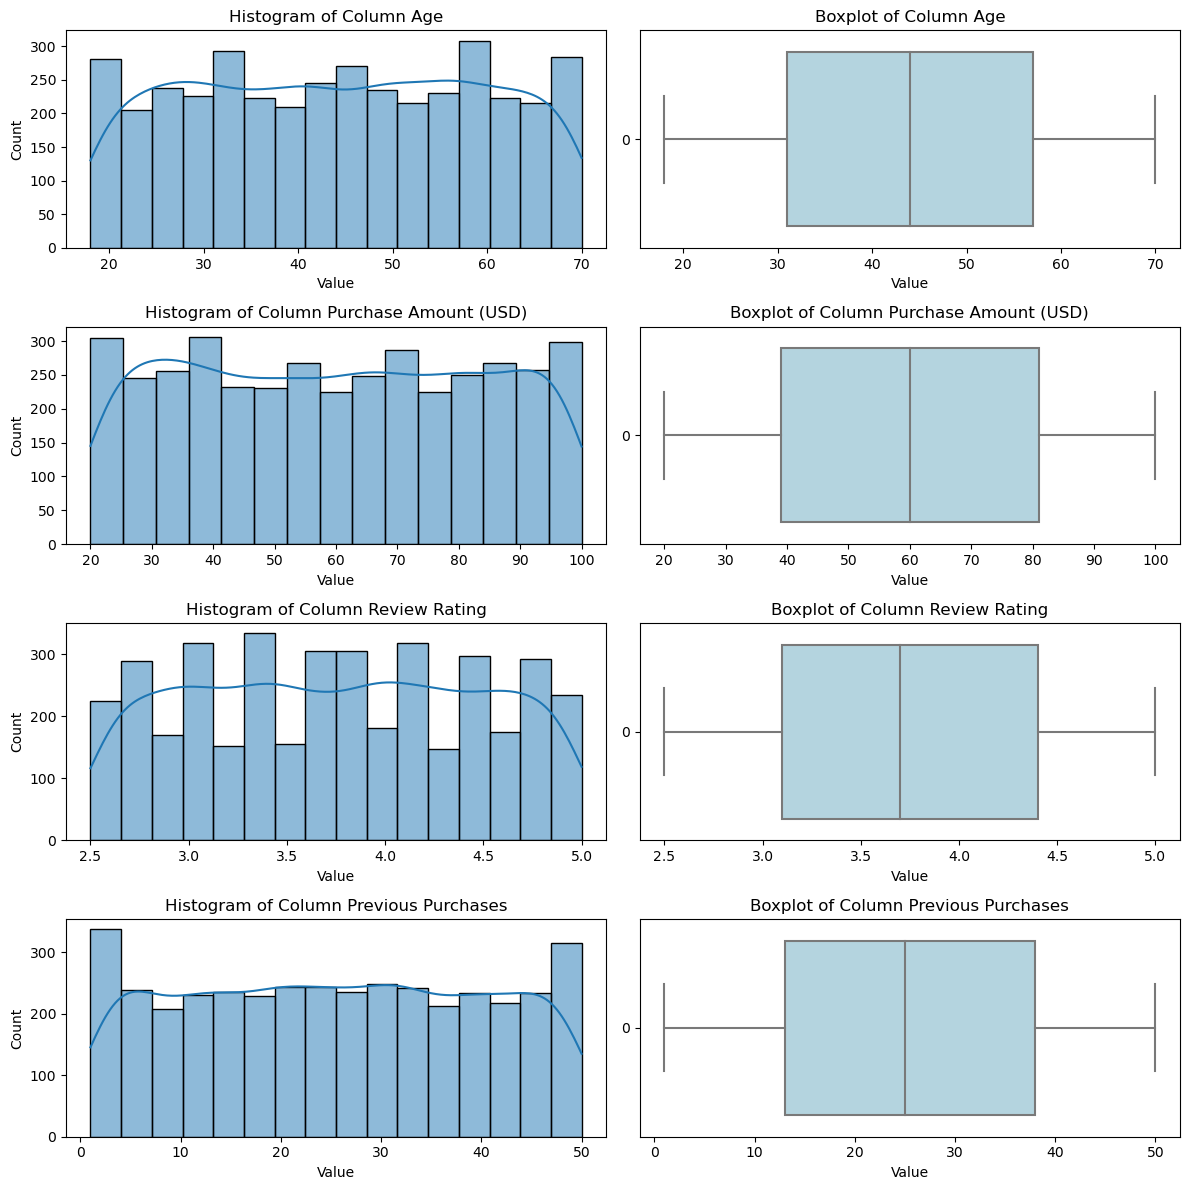

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 생성 (numeric_data)
numeric_cols = ['Age','Purchase Amount (USD)','Review Rating','Previous Purchases']
numeric_data = data[numeric_cols]

# Figure와 Axes 배열 생성
fig, ax = plt.subplots(4, 2, figsize=(12, 12))

# 각 컬럼에 대해 반복하여 histogram과 boxplot을 그립니다.
for i in range(4):
    col = numeric_data.iloc[:, i]
    
    # Histogram 그리기
    sns.histplot(data=col, bins='auto', kde=True, ax=ax[i, 0])
    ax[i, 0].set_title(f'Histogram of Column {numeric_cols[i]}')
    ax[i, 0].set_xlabel(f'Value')
    
    # Boxplot 그리기
    sns.boxplot(data=col, ax=ax[i, 1], orient='h', color='lightblue')
    ax[i, 1].set_title(f'Boxplot of Column {numeric_cols[i]}')
    ax[i, 1].set_xlabel(f'Value')

# 서브플롯 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()


In [5]:
np.unique(data.Age.values, return_counts=True)

(array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70], dtype=int64),
 array([69, 81, 62, 69, 66, 71, 68, 85, 69, 83, 79, 76, 71, 79, 82, 63, 68,
        72, 74, 77, 70, 68, 72, 86, 80, 79, 51, 72, 76, 71, 68, 84, 83, 72,
        73, 70, 83, 73, 74, 87, 81, 75, 65, 65, 83, 75, 73, 72, 71, 54, 75,
        88, 67], dtype=int64))

In [6]:
# 나이를 구분하는 함수 정의
def categorize_age(age):
    if age >= 10 and age < 20:
        return '10대'
    elif age >=20 and age < 30:
        return '20대'
    elif age >= 30 and age < 40:
        return '30대'
    elif age >=40 and age < 50:
        return '40대'
    elif age >=50 and age < 60:
        return '50대'
    elif age >=60 and age < 70:
        return '60대'
    else:
        return '70대'
    
# apply 함수를 사용하여 나이대 컬럼도 추가하기 
data['Age_cat'] = data['Age'].apply(categorize_age)

# null 값이 있는지 확인 
data['Age_cat'].isnull().sum()

0

Text(0.5, 0, 'Count')

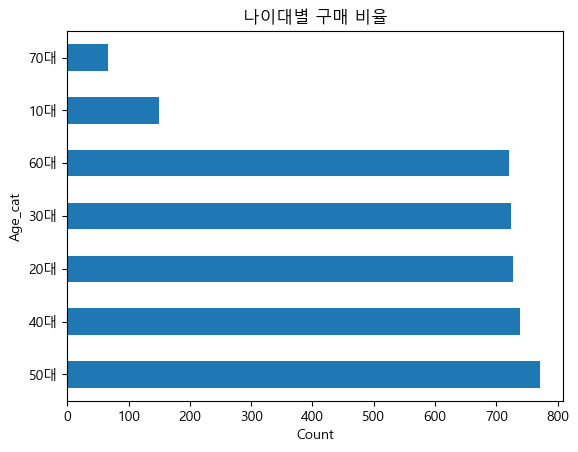

In [108]:
# 나이대별로 해당 사이트에서 주문한 비율 
data['Age_cat'].value_counts().plot(kind='barh');
plt.title('나이대별 구매 비율')
plt.xlabel('Count')

- 이 사이트에서 구매한 비율은 50대가 가장 많았음 
- 10대 및 70대 비율이 가장 낮음

In [7]:
# 나이구간별로 pivot table 생성하기 
pivot_table = data.pivot_table(index='Age_cat', values=['Purchase Amount (USD)', 'Review Rating', 'Previous Purchases'], aggfunc='mean')

pivot_table

,Previous Purchases,Purchase Amount (USD),Review Rating
Age_cat,,,
10대,22.893333,60.533333,3.786000
20대,25.065934,60.199176,3.792995
30대,24.877072,60.139503,3.758840
40대,24.943166,58.491204,3.716915
50대,26.208820,60.332036,3.712581
60대,26.208044,59.755895,3.764355
70대,24.507463,56.865672,3.744776


- 평균 구매 금액 및 평균 이전 구매 금액은 나이대별로 크게 차이가 없음. 

In [8]:
# 한글 대응 
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

rc('font', family='Malgun Gothic')


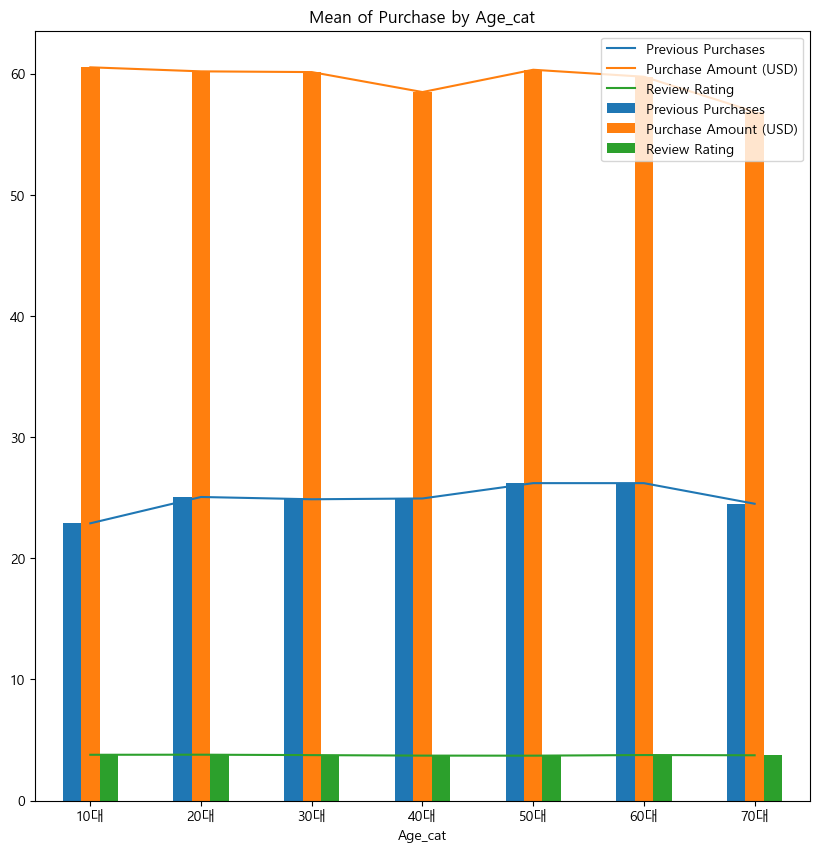

In [15]:
fig,ax1=plt.subplots(figsize=(10,10))
pivot_table.plot(kind='bar', rot=0, ax=ax1)
pivot_table.plot(kind='line', ax=ax1)

plt.title('Mean of Purchase by Age_cat')
plt.legend(loc='upper right')

- 나이 구간별로 데이터 수치에 대한 뚜렷한 차이는 없다. 
- 미미하지만 구매금액은 40대가 가장 낮고, 10대가 가장 높다. 
- 이전 구매 금액은 10대가 가장 낮고, 50대가 가장 높다. 

In [16]:
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age_cat
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,50대
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,10대
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,50대
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,20대
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,40대
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,50대
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,40대
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,40대


In [31]:
import warnings

warnings.filterwarnings('ignore')

In [43]:
data.groupby('Age_cat')['Gender'].value_counts(normalize=True).unstack()

Gender,Female,Male
Age_cat,,
10대,0.313333,0.686667
20대,0.313187,0.686813
30대,0.323204,0.676796
40대,0.339648,0.660352
50대,0.313878,0.686122
60대,0.310680,0.689320
70대,0.328358,0.671642


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


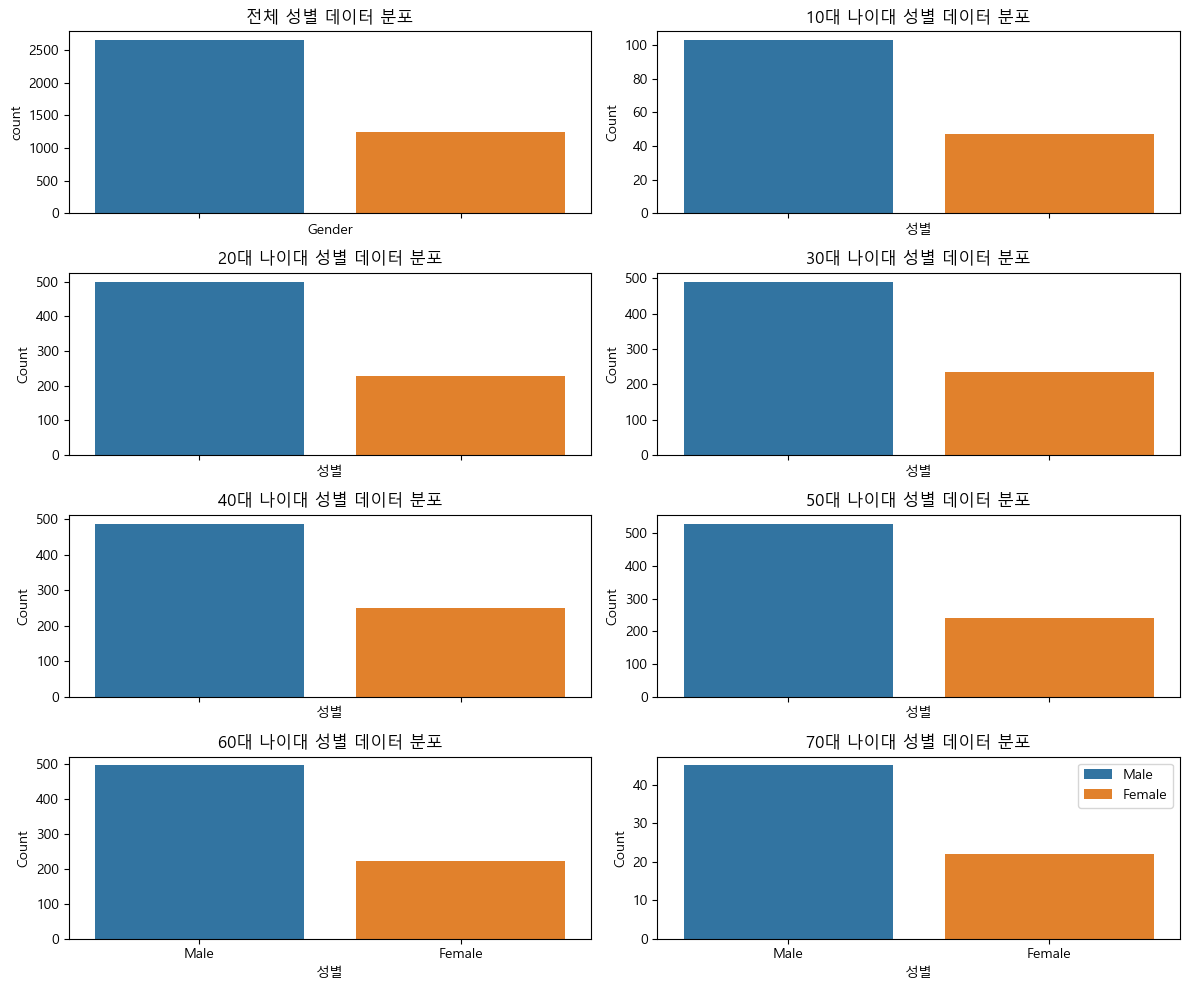

In [38]:
age_groups = ['10대','20대','30대','40대','50대','60대','70대']

# 전체 성별과 나이대별 성별의 데이터 분포를 시각화해보자 
fig, axes = plt.subplots(4, 2, figsize=(12, 10), sharex=True)

# 전체 성별 데이터의 분포
sns.countplot(x='Gender', data=data, ax=axes[0, 0])
axes[0, 0].set_title('전체 성별 데이터 분포')

n=0
# 나이대별 성별 데이터의 분포 (각각의 서브플롯에)
for i, age_group in enumerate(age_groups):
    if i % 2 ==0:
        sns.countplot(x='Gender', data=data[data['Age_cat'] == age_group], ax=axes[i//2, i%2+1], label=['Male','Female'])
        axes[i//2, i%2+1].set_title(f'{age_group} 나이대 성별 데이터 분포')
        axes[i//2, i%2+1].set_xlabel('성별')
        axes[i//2, i%2+1].set_ylabel('Count')
        plt.legend(loc='upper right');
    else:
        sns.countplot(x='Gender', data=data[data['Age_cat'] == age_group], ax=axes[n+1, 0], label=['Male','Female'])
        n+=1
        axes[n, 0].set_title(f'{age_group} 나이대 성별 데이터 분포')
        axes[n, 0].set_xlabel('성별')
        axes[n, 0].set_ylabel('Count')
        plt.legend(loc='upper right');

# 레이아웃 조정
plt.tight_layout()
plt.show()

- 전체 성별 및 나이대별 성별의 분포를 분석한 결과, Male이 Female보다 압도적으로 높았다. 

In [39]:
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age_cat
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,50대
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,10대
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,50대
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,20대
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,40대
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,50대
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,40대
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,40대


In [42]:
# 연령대별 구독 여부 확인 

data.groupby('Age_cat')['Subscription Status'].value_counts(normalize=True).unstack()

Subscription Status,No,Yes
Age_cat,,
10대,0.753333,0.246667
20대,0.730769,0.269231
30대,0.733425,0.266575
40대,0.733424,0.266576
50대,0.712062,0.287938
60대,0.740638,0.259362
70대,0.686567,0.313433


- 10대 구독이 제일 높고 , 70대의 구독이 제일 낮음
- 연령대가 높을 수록 구독률이 낮음

In [44]:
# 연령대별 promo 코드 여부 확인 

data.groupby('Age_cat')['Promo Code Used'].value_counts(normalize=True).unstack()

Promo Code Used,No,Yes
Age_cat,,
10대,0.586667,0.413333
20대,0.560440,0.439560
30대,0.563536,0.436464
40대,0.596752,0.403248
50대,0.564202,0.435798
60대,0.564494,0.435506
70대,0.537313,0.462687


- 이것도 마찬가지로 연령대가 낮을수록 promotion 활용 비율이 높았음 

In [55]:
payment = data['Payment Method'].value_counts()

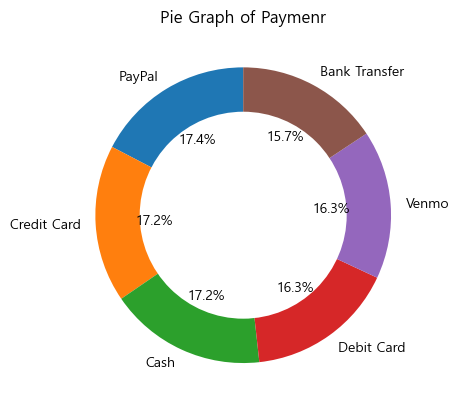

In [60]:
fig, ax = plt.subplots()
ax.pie(payment, labels=payment.index, autopct='%1.1f%%', startangle=90);

center_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

ax.set_title('Pie Graph of Paymenr')

plt.show()

- 지불방법은 Paypal > Credic card > cash > Debit Card > Venmo > Bank Transfer

In [62]:
# 연령대별로 지불 상태 확인해보자 
groupped = data.groupby('Age_cat')['Payment Method'].value_counts(normalize=True).unstack()

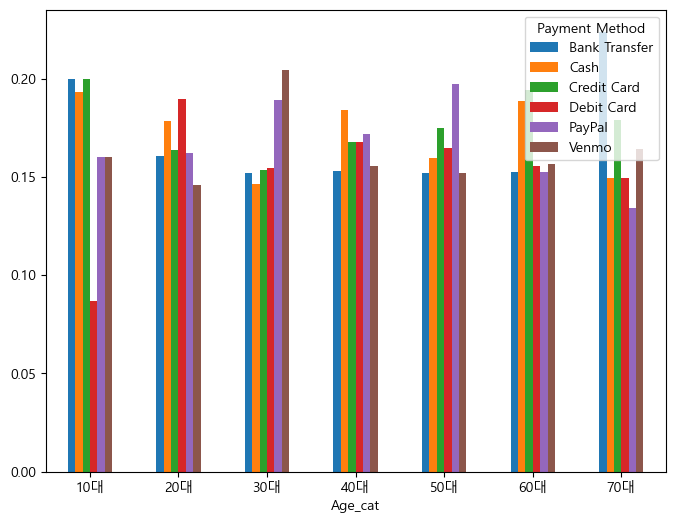

In [65]:
groupped.plot(kind='bar', figsize=(8,6))
plt.xticks(rotation=0);

- 10대 : Debit Card(현금카드) 가 가장 낮음. 계좌이체 또는 신용카드 비율이 높음 
- 20대 : 현금카드 비율이 높음. venmo 비율이 낮음
- 30대 : venmo 비율이 높음.
- 60대 : 신용카드 비율이 높음. 
- 70대 : 계좌이체 비율이 높음.

In [72]:
# 구매한 제품 분석 
data['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

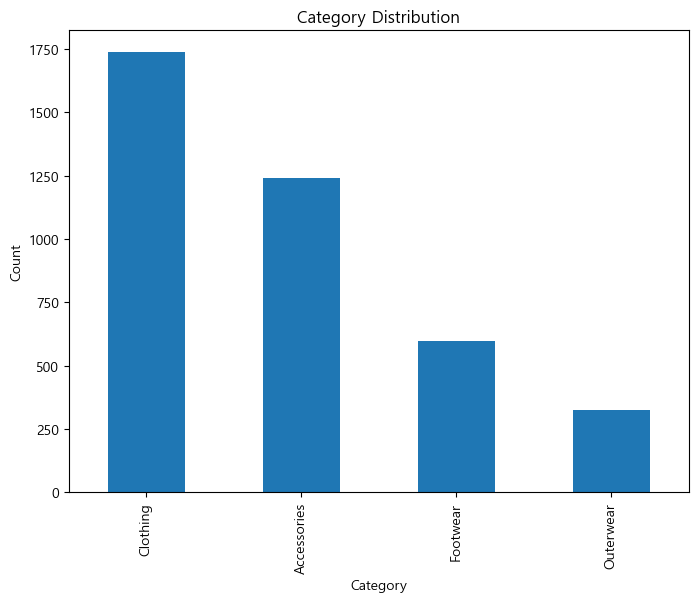

In [73]:
plt.figure(figsize =(8,6))
data["Category"].value_counts().plot(kind ="bar")
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [111]:
category_data = data.groupby('Category')['Age_cat'].value_counts().unstack()
category_data

Age_cat,10대,20대,30대,40대,50대,60대,70대
Category,,,,,,,
Accessories,43,232,247,225,229,239,25
Clothing,69,335,319,329,339,320,26
Footwear,20,107,106,114,142,98,12
Outerwear,18,54,52,71,61,64,4


<Axes: xlabel='Age_cat', ylabel='Category'>

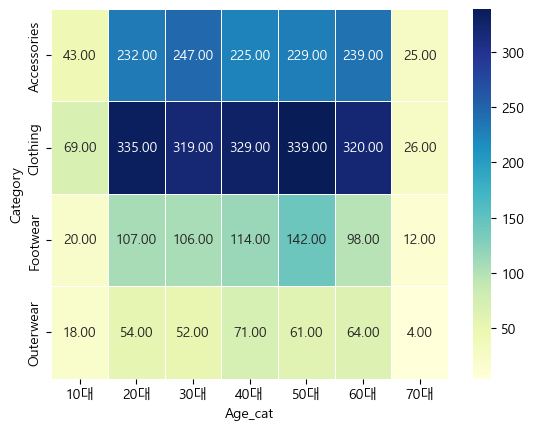

In [142]:
sns.heatmap(data=category_data, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)

- Clothing > Accessories 순으로 구매 비율이 높다 
- 50대의 경우 Footwear도 구매 비율이 높다 

In [146]:
# 나이대별로 구매 빈도도 살펴보자 

data.groupby('Age_cat')['Frequency of Purchases'].value_counts().unstack()

Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Age_cat,,,,,,,
10대,20,22,27,27,17,22,15
20대,101,125,105,94,99,111,93
30대,109,88,121,106,107,92,101
40대,106,102,111,102,116,93,109
50대,105,111,107,109,109,117,113
60대,123,90,102,97,88,122,99
70대,8,9,11,7,17,6,9


In [181]:
frequency_data_raw = data.pivot_table(index='Age_cat', columns='Frequency of Purchases', values='Age',aggfunc=sum, margins=True, margins_name='합계')
frequency_data_raw

Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly,합계
Age_cat,,,,,,,,
10대,370,408,501,503,316,407,276,2781
20대,2399,3151,2560,2307,2473,2796,2296,17982
30대,3812,3018,4137,3620,3693,3168,3491,24939
40대,4690,4564,4946,4528,5173,4144,4815,32860
50대,5807,6062,5837,5906,5951,6338,6150,42051
60대,7911,5798,6599,6270,5693,7885,6408,46564
70대,560,630,770,490,1190,420,630,4690
합계,25549,23631,25350,23624,24489,25158,24066,171867


In [184]:
normalization_data = frequency_data  # type: ignore
normalization_data

Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly,합계
Age_cat,,,,,,,,
10대,0.735586,0.811133,0.996024,1.000000,0.628231,0.809145,0.548708,2781
20대,0.761346,1.000000,0.812440,0.732149,0.784830,0.887337,0.728658,17982
30대,0.921441,0.729514,1.000000,0.875030,0.892676,0.765772,0.843848,24939
40대,0.906631,0.882273,0.956118,0.875314,1.000000,0.801083,0.930795,32860
50대,0.916220,0.956453,0.920953,0.931840,0.938940,1.000000,0.970338,42051
60대,1.000000,0.732904,0.834155,0.792567,0.719631,0.996713,0.810011,46564
70대,0.470588,0.529412,0.647059,0.411765,1.000000,0.352941,0.529412,4690
합계,25549.000000,23631.000000,25350.000000,23624.000000,24489.000000,25158.000000,24066.000000,171867


In [187]:
normalization_data.iloc[:,7]=1

In [191]:
normalization_data.iloc[7,:] = 1

In [192]:
normalization_data

Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly,합계
Age_cat,,,,,,,,
10대,0.735586,0.811133,0.996024,1.000000,0.628231,0.809145,0.548708,1
20대,0.761346,1.000000,0.812440,0.732149,0.784830,0.887337,0.728658,1
30대,0.921441,0.729514,1.000000,0.875030,0.892676,0.765772,0.843848,1
40대,0.906631,0.882273,0.956118,0.875314,1.000000,0.801083,0.930795,1
50대,0.916220,0.956453,0.920953,0.931840,0.938940,1.000000,0.970338,1
60대,1.000000,0.732904,0.834155,0.792567,0.719631,0.996713,0.810011,1
70대,0.470588,0.529412,0.647059,0.411765,1.000000,0.352941,0.529412,1
합계,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1


<Axes: xlabel='Frequency of Purchases', ylabel='Age_cat'>

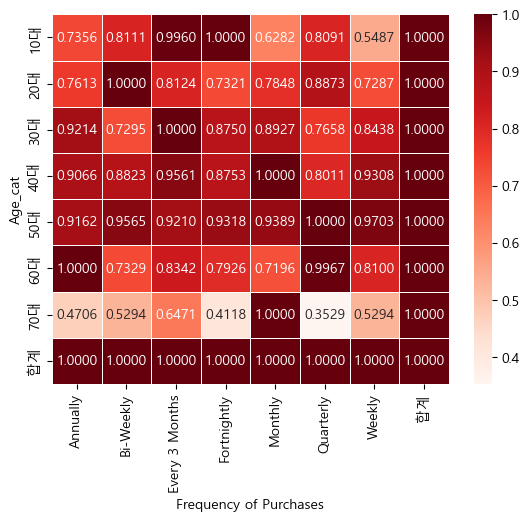

In [193]:
sns.heatmap(data=normalization_data, cmap='Reds', annot=True, fmt='.4f', linewidths=.5)

- 나이별 구매 주기를 살펴보자 
- Annual : 매년 / Bi-Weekly : 2주에 한 번 / Every 3 Months : 3개월마다 
- Fortinghtly : 2주에 한 번 /Monthly : 한달마다 /Quarterly : 분기마다 / Weekly매주

- 10대 : 3개월마다 , 2주에 한번 
- 20대 : 2주에 한번, 분기마다 한번
- 30대 : 3달에 한번, 매년
- 40대 : 매달, 3개월에 한번 
- 50대 : 분기에 한번, 매주 
- 60대 : 매년, 분기에 한번 
- 70대 : 한달에 한번

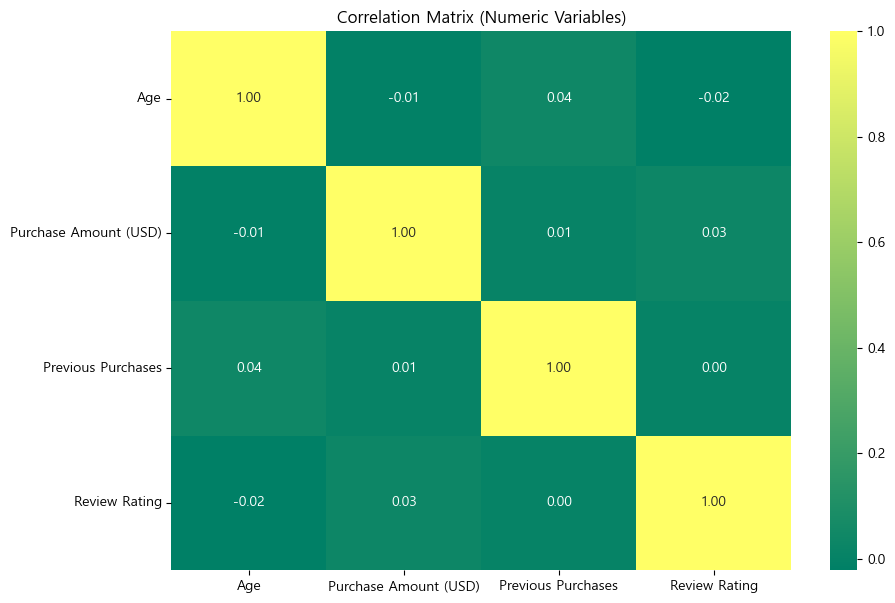

In [198]:
# age, purchase amount, previous purchase, reveiw 간 상관관계 분석 
plt.figure(figsize =(10,7))
sns.heatmap(data[["Age","Purchase Amount (USD)", "Previous Purchases","Review Rating"]].corr(), annot =True, cmap="summer",fmt =".2f")
plt.title('Correlation Matrix (Numeric Variables)')
plt.show()

- 상관관계가 각 컬럼끼리 높지 않다. 
- 면밀히 보면, 구매금액과 review 평점 간에 관계가 약하게 있음. 

In [199]:
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age_cat
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,50대
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,10대
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,50대
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,20대
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,40대
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,50대
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,40대
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,40대


In [201]:
# 머신러닝을 돌려보자 
# 먼저 숫자 타입이 아닌 컬럼 을 숫자로 바꿔보자 
from sklearn.preprocessing import LabelEncoder

obj_columns = ['Gender', 'Category', 'Subscription Status', 'Discount Applied', 'Frequency of Purchases']

for col in obj_columns:
    le = LabelEncoder()
    le.fit(data[col])

    data[col+'_enco'] = le.transform(data[col])


In [202]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age_cat,Gender_enco,Category_enco,Subscription Status_enco,Discount Applied_enco,Frequency of Purchases_enco
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,14,Venmo,Fortnightly,50대,1,1,1,1,3
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,2,Cash,Fortnightly,10대,1,1,1,1,3
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,23,Credit Card,Weekly,50대,1,1,1,1,6
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,49,PayPal,Weekly,20대,1,2,1,1,6
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,31,PayPal,Annually,40대,1,1,1,1,0


- Gender : Male(1), Female(0)
- Category : Accessories(0), Clothing(1), Footwear(2), Outerwear(3)
- Subscription : yes(1), no(0)
- Discount : yes(1), no(0)
- Frequency of Purchases 
    Annually(0), Bi-Weekly(1), Every 3 Months(2),
    Monthly(3), Quarterly(4), Weekly(5) 

In [222]:
data[['Frequency of Purchases_enco','Frequency of Purchases']].value_counts()

Frequency of Purchases_enco  Frequency of Purchases
1                            Bi-Weekly                 1089
2                            Every 3 Months             584
0                            Annually                   572
4                            Quarterly                  563
3                            Monthly                    553
5                            Weekly                     539
Name: count, dtype: int64

In [217]:
data.drop('Frequency of Purchases_enco', axis='columns',inplace=True)
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age_cat,Gender_enco,Category_enco,Subscription Status_enco,Discount Applied_enco
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Yes,14,Venmo,Fortnightly,50대,1,1,1,1
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Yes,2,Cash,Fortnightly,10대,1,1,1,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Yes,23,Credit Card,Weekly,50대,1,1,1,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,Yes,49,PayPal,Weekly,20대,1,2,1,1
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Yes,31,PayPal,Annually,40대,1,1,1,1


In [220]:
# Fortnightly, Bi-weekly 의미가 같기 때문에 동일한 단어로 replace함

data['Frequency of Purchases'].replace('Bi-weekly','Bi-Weekly', inplace=True)
data['Frequency of Purchases'].value_counts()

Frequency of Purchases
Bi-Weekly         1089
Every 3 Months     584
Annually           572
Quarterly          563
Monthly            553
Weekly             539
Name: count, dtype: int64

In [221]:
# 다시 인코더 작업 실행 
le = LabelEncoder()
le.fit(data['Frequency of Purchases'])

data['Frequency of Purchases_enco'] = le.transform(data['Frequency of Purchases'])

data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age_cat,Gender_enco,Category_enco,Subscription Status_enco,Discount Applied_enco,Frequency of Purchases_enco
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,14,Venmo,Bi-Weekly,50대,1,1,1,1,1
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,2,Cash,Bi-Weekly,10대,1,1,1,1,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,23,Credit Card,Weekly,50대,1,1,1,1,5
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,49,PayPal,Weekly,20대,1,2,1,1,5
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,31,PayPal,Annually,40대,1,1,1,1,0


In [239]:
# Previous Purchases의 백분위수 계산 

percentiles = np.percentile(data['Previous Purchases'], [25, 50, 75])
print("25th percentile:", percentiles[0])
print("50th percentile (median):", percentiles[1])
print("75th percentile:", percentiles[2])

25th percentile: 13.0
50th percentile (median): 25.0
75th percentile: 38.0


In [240]:
# Purchase Amount (USD)의 백분위수 계산 

percentiles = np.percentile(data['Purchase Amount (USD)'], [25, 50, 75])
print("25th percentile:", percentiles[0])
print("50th percentile (median):", percentiles[1])
print("75th percentile:", percentiles[2])

25th percentile: 39.0
50th percentile (median): 60.0
75th percentile: 81.0


In [277]:
# 백분위수 75% 이상 또는 매주 구매 > 우수고객으로 평가 
def loyal_customer(row):
    if (row['Purchase Amount (USD)'] >= 81) | (row['Frequency of Purchases'] == 'Weekly'):
        return 1
    else:
        return 0

In [278]:
data['Label'] = np.nan

data['Label'] = data.apply(loyal_customer, axis=1)
data['Label'].value_counts()

Label
0    2513
1    1387
Name: count, dtype: int64

In [279]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Previous Purchases,Payment Method,Frequency of Purchases,Age_cat,Gender_enco,Category_enco,Subscription Status_enco,Discount Applied_enco,Frequency of Purchases_enco,Label
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,14,Venmo,Bi-Weekly,50대,1,1,1,1,1,0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,2,Cash,Bi-Weekly,10대,1,1,1,1,1,0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,23,Credit Card,Weekly,50대,1,1,1,1,5,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,49,PayPal,Weekly,20대,1,2,1,1,5,1
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,31,PayPal,Annually,40대,1,1,1,1,0,0


In [280]:
from sklearn.model_selection import train_test_split

X = data[['Age', 'Previous Purchases','Review Rating','Gender_enco','Category_enco',
          'Subscription Status_enco','Discount Applied_enco',
          'Frequency of Purchases_enco']]
y = data['Label']

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=13)

In [282]:
# 1. Decision Tree 만들기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=4,random_state=13)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [283]:
pred=dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.7788461538461539


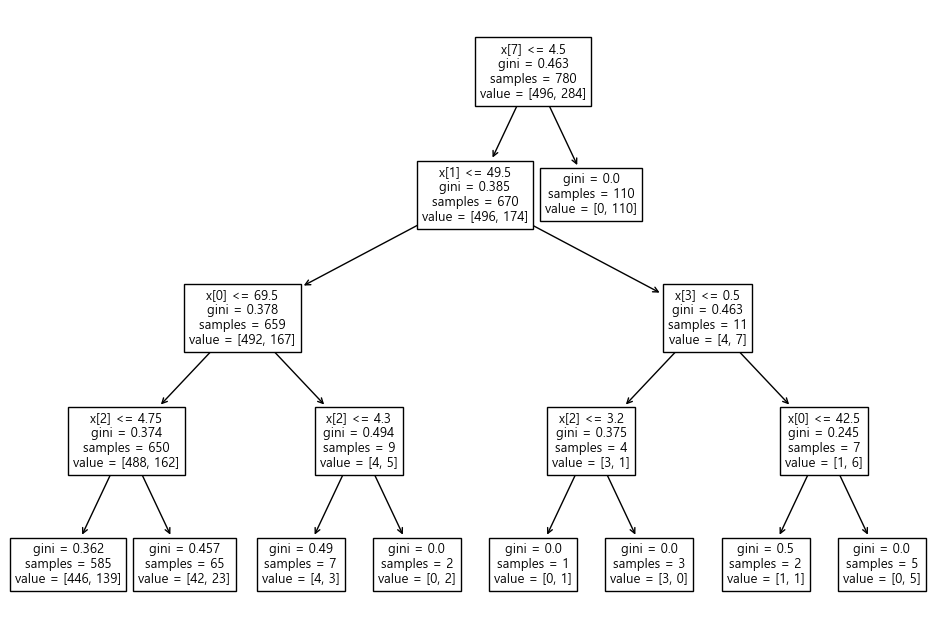

In [284]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dt);

In [289]:
new_data = np.array([[65,28,3.5,1,1,1,1,1]])

dt.predict(new_data)

array([0], dtype=int64)